<a href="https://colab.research.google.com/github/mariav0721/deep-learning-challenge/blob/main/Starter_Code_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN', 'NAME'])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
type_counts = application_df['APPLICATION_TYPE'].value_counts()
type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(type_counts.iloc[8:].index)
cutoff_value = 528

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification_types = application_df['CLASSIFICATION'].value_counts()
classification_types

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_types.iloc[5:].index)


# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(application_df, drop_first=True)
dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1,142590,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [10]:
# Split our preprocessed data into our features and target arrays
y = dummies['IS_SUCCESSFUL'].values
X = dummies.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

input_features_total = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 296       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 347 (1.36 KB)
Trainable params: 347 (1.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
#  YOUR CODE GOES HERE

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 3s - loss: 0.7322 - accuracy: 0.4406 - 3s/epoch - 10ms/step
Loss: 0.7322160005569458, Accuracy: 0.44058308005332947


In [16]:
# Export our model to HDF5 file

filepath = r"C:\Users\manen\Desktop\GitHub\deep-learning-challenge\Starter_Code\AlphabetSoupCharity.h5"
nn.save(filepath, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Attempt 2 to achieve higher than 75%**

In [22]:
# (FIRST ATTEMPT - 73% accuracy)
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 16
hidden_nodes_layer2 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                592       
                                                                 
 dense_10 (Dense)            (None, 10)                170       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 773 (3.02 KB)
Trainable params: 773 (3.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Compile the model with an appropriate loss, optimizer, and metrics
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Train the model (FIRST ATTEMPT)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5421 - accuracy: 0.7353
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5420 - accuracy: 0.7349
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5419 - accuracy: 0.7348
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5417 - accuracy: 0.7353
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5420 - accuracy: 0.7342
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5419 - accuracy: 0.7357
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5419 - accuracy: 0.7345
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5418 - accuracy: 0.7348
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5418 - accuracy: 0.7350
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5416 - accura

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5496 - accuracy: 0.7341 - 654ms/epoch - 2ms/step
Loss: 0.5496096611022949, Accuracy: 0.7341107726097107


<Axes: >

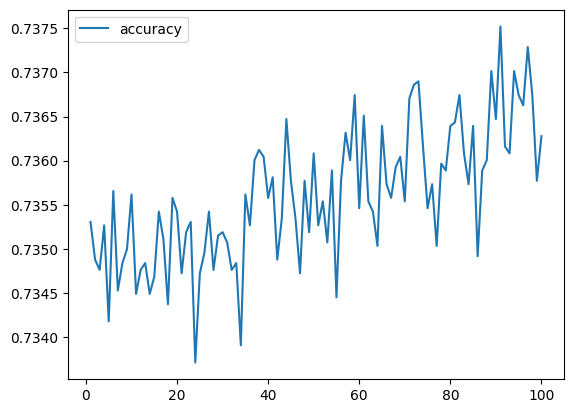

In [27]:
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

**Results:**

The increase in accuracy and a slight rise in the loss compared to the previous results siggesting that the  model is potentially overfitting the training data. This means it performs well on the training data but might not generalize as effectively to new, unseen data.

**Attempt 3 **

In [36]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features_total = len(X_train[0])
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 10
hidden_nodes_layer3 =15

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = input_features_total, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 20)                740       
                                                                 
 dense_19 (Dense)            (None, 10)                210       
                                                                 
 dense_20 (Dense)            (None, 1)                 11        
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Compile the model with an appropriate loss, optimizer, and metrics
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
# Train the model (FIRST ATTEMPT)
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5987 - accuracy: 0.6932
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5616 - accuracy: 0.7257
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5576 - accuracy: 0.7261
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5561 - accuracy: 0.7275
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5549 - accuracy: 0.7282
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5537 - accuracy: 0.7284
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.7274
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5524 - accuracy: 0.7289
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5516 - accuracy: 0.7285
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5513 - accura

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5468 - accuracy: 0.7349 - 442ms/epoch - 2ms/step
Loss: 0.5468481183052063, Accuracy: 0.7349271178245544


With a final validation accuracy of approximately 73.49% and a loss of approximately 0.5468, your model has shown improvement. I was not able to achieve a 75%.